# Word2vec

In [1]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['it\'s','now','more','than','two'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [2]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, vector_size=10,window=3)
print(model)


Word2Vec<vocab=19, vector_size=10, alpha=0.025>


In [3]:
words = list(model.wv.key_to_index)
print(words)



['example', 'this', 'is', 'more', 'the', 'second', 'a', 'first', 'of', 'text', 'final', 'and', 'now', 'than', 'two', 'yet', 'another', 'one', "it's"]


In [4]:

print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[-0.08619688  0.03665738  0.05189884  0.05741937  0.07466917 -0.06167676
  0.01105614  0.06047282 -0.02840052 -0.06173522]


In [5]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=19, vector_size=10, alpha=0.025>


In [6]:
X = model.wv[new_model.wv.key_to_index]

In [7]:
X.shape

(19, 10)

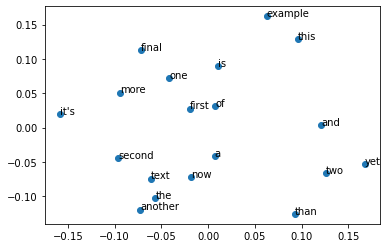

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [9]:
import gensim.downloader as api

In [10]:
corpus = api.load('text8')

In [11]:
type(corpus)


text8.Dataset

In [12]:
from gensim.models.word2vec import Word2Vec
model8= Word2Vec(corpus)

In [13]:
model8.wv['tree']

array([-0.23079398, -0.43970823,  2.2798924 , -1.5483826 ,  0.06246279,
       -0.51891595, -0.1913694 , -1.2148767 , -1.5664415 , -2.2519214 ,
        0.7698397 , -1.5267763 ,  0.6133938 ,  1.4659061 , -1.7068994 ,
        4.194958  ,  2.244953  , -0.0511989 ,  0.3770506 ,  0.341617  ,
       -0.65488636,  0.1569228 , -0.86111146, -2.3984036 , -0.5889176 ,
        0.0737632 ,  0.22499001, -0.0317995 , -1.1472272 , -0.64464504,
        1.4044857 , -0.02428154,  1.1975864 , -1.3938736 ,  1.4510269 ,
        0.63994503,  0.13123307, -0.8164454 , -1.3898686 , -0.6661112 ,
       -0.13271001, -2.400223  , -0.10032653, -0.31900826,  0.19541106,
        0.87513006,  0.9774659 , -0.25845718,  0.10798106,  0.03481791,
       -1.6733944 , -0.16540797, -0.15120338,  2.1754777 ,  0.65360737,
       -0.75440717, -0.8159251 ,  0.9946306 , -3.1527126 ,  0.96312714,
       -2.6075635 , -0.41759828, -0.40050405,  3.487102  , -0.69065994,
       -1.6393697 , -0.23112343, -1.6879632 ,  1.5670875 , -1.37

In [14]:
print(model8.wv.most_similar('tree'))

[('trees', 0.7130633592605591), ('leaf', 0.6996258497238159), ('fruit', 0.6304346323013306), ('flower', 0.6301509141921997), ('bird', 0.6226281523704529), ('bark', 0.620945930480957), ('calf', 0.6128720641136169), ('sap', 0.60650634765625), ('cactus', 0.6047248244285583), ('tooth', 0.5985922813415527)]


In [15]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Analogies

In [16]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.6678013801574707), ('princess', 0.6208376884460449), ('elizabeth', 0.6116613149642944)]


In [17]:
print(model8.wv.most_similar(positive=['italy', 'renault'], negative=['france'], topn=3))


[('mclaren', 0.6766727566719055), ('chevrolet', 0.6559633016586304), ('scuderia', 0.6519873142242432)]


In [18]:
print(model8.wv.most_similar(positive=['france', 'venice'], negative=['italy'], topn=3))


[('bologna', 0.7581573128700256), ('toulouse', 0.7570486068725586), ('paris', 0.7516875863075256)]


In [19]:
print(model8.wv.most_similar(positive=['usa', 'beatles'], negative=['england'], topn=3))

[('dj', 0.6649004817008972), ('promotional', 0.5842692852020264), ('unplugged', 0.57940274477005)]


In [20]:
model8.wv.most_similar(['apple','orange'])

[('iie', 0.6616296172142029),
 ('mcintosh', 0.636538565158844),
 ('jaguar', 0.6284868717193604),
 ('logo', 0.620890736579895),
 ('rum', 0.6114639043807983),
 ('coleco', 0.6058065295219421),
 ('nes', 0.6022999882698059),
 ('lotus', 0.601905345916748),
 ('nintendo', 0.5978764295578003),
 ('mazda', 0.5899168252944946)]

##  Loading pre-trained models

In [ ]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# available at https://code.google.com/archive/p/word2vec/ (1.5 GB)

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [22]:
print(model.most_similar('tree'))

[('trees', 0.829312264919281), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917218565940857), ('willow_tree', 0.6845874786376953), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498864173889), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547872424125671)]


In [23]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723939061164856), ('royalists', 0.45945391058921814)]


In [24]:
print(model.most_similar(positive=['italy', 'beatles'], negative=['england'], topn=3))


[('radiohead', 0.5180865526199341), ('metallica', 0.511135458946228), ('quinto', 0.5088788866996765)]


### Glove

In [ ]:
# https://nlp.stanford.edu/projects/glove/

# converting format from glove to w2v

#from gensim.scripts.glove2word2vec import glove2word2vec
#glove_input_file = 'glove.42B.300d.txt'
#word2vec_output_file = 'glove.42B.300d.txt.word2vec'
#glove2word2vec(glove_input_file, word2vec_output_file)

/tmp/ipykernel_1583278/2104477813.py:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(1917494, 300)

In [ ]:
from gensim.models import KeyedVectors

filename = 'glove.42B.300d.txt.word2vec'
# github: https://github.com/stanfordnlp/GloVe
# available at https://huggingface.co/stanfordnlp/glove/resolve/main/glove.42B.300d.zip (1.75 GB)
# or https://nlp.stanford.edu/data/glove.42B.300d.zip

model = KeyedVectors.load_word2vec_format(filename, binary=False)

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7833545207977295)]


In [23]:
print(model.most_similar('tree'))

[('trees', 0.834145724773407), ('branches', 0.6109411716461182), ('leaf', 0.6104052066802979), ('pine', 0.6100702285766602), ('forest', 0.5894954800605774), ('garden', 0.5828163623809814), ('vine', 0.5765968561172485), ('branch', 0.5740603804588318), ('flower', 0.5736389756202698), ('willow', 0.5727055668830872)]


### doc2vec

In [4]:
from gensim.models.doc2vec import Doc2Vec,\
    TaggedDocument
from nltk.tokenize import word_tokenize

# define a list of documents.
data = ["This is the first document",
        "This is the second document",
        "This is the third document",
        "This is the fourth document"]

# preproces the documents, and create TaggedDocuments
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()),
                              tags=[str(i)]) for i,
               doc in enumerate(data)]

# train the Doc2vec model
model = Doc2Vec(vector_size=20,
                min_count=2, epochs=50)
model.build_vocab(tagged_data)
model.train(tagged_data,
            total_examples=model.corpus_count,
            epochs=model.epochs)

# get the document vectors
document_vectors = [model.infer_vector(
    word_tokenize(doc.lower())) for doc in data]

#  print the document vectors
for i, doc in enumerate(data):
    print("Document", i+1, ":", doc)
    print("Vector:", document_vectors[i])
    print()

Document 1 : This is the first document
Vector: [ 0.01829372  0.01898625 -0.01015439 -0.02139979 -0.00219488 -0.01278661
  0.0057653   0.00376999  0.01010406 -0.0139157   0.0149696  -0.00375327
  0.01521769  0.01674412  0.00122827 -0.00897841  0.01651305 -0.01268177
 -0.00968535  0.01601388]

Document 2 : This is the second document
Vector: [-0.02194232 -0.00161561 -0.004956   -0.02052376 -0.01844925 -0.00861808
 -0.00752903  0.00610552  0.00801064 -0.01666425 -0.01200165 -0.0116139
  0.01689893  0.01475287 -0.01185068 -0.02328943 -0.01243623  0.00913869
 -0.00036527  0.02297601]

Document 3 : This is the third document
Vector: [ 0.01136813  0.02225649  0.01151399  0.00395306  0.01601991 -0.00457977
  0.01904687 -0.00682187 -0.00727036  0.0126621   0.00353148 -0.00427921
 -0.01149058 -0.02284315  0.00797717  0.0008119  -0.00853441 -0.01248294
 -0.01282259  0.0243165 ]

Document 4 : This is the fourth document
Vector: [ 0.00805911  0.0239163   0.01924852 -0.00192382 -0.00353936  0.00352